In [2]:
import sys
sys.path.append('/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/')  # Adiciona o diretório ao caminho do Python

%load_ext autoreload  
%autoreload 2         

from depth_from_focus import *  
from image_alignment import *
from utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def teste_argmax_fuzzy_1d():
    vector_teste = [17 - ((i-3.14)**2) for i in range(20)]
    res = argmax_fuzzy_1d(vector_teste)
    print(res)
    assert abs(res - 3.14) < 1.0e-6


In [4]:
teste_argmax_fuzzy_1d()

3.140000000000014


In [5]:
vector_teste = [17 - ((i-3.14)**2) for i in range(20)]
vector_teste

[7.1404,
 12.4204,
 15.7004,
 16.9804,
 16.2604,
 13.5404,
 8.820400000000001,
 2.1004000000000005,
 -6.619599999999995,
 -17.33959999999999,
 -30.05959999999999,
 -44.77959999999999,
 -61.49959999999999,
 -80.21959999999999,
 -100.93959999999998,
 -123.65959999999998,
 -148.37959999999998,
 -175.09959999999998,
 -203.81959999999998,
 -234.53959999999998]

In [6]:
# Definindo o caminho base
base_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/'
img_path = base_path + 'output/align_images'
laplacian_save_path = base_path + "output/laplacian_images/"
focus_save_path = base_path + 'output/focus/'
select_save_path = base_path + 'output/select/'
depth_save_path = base_path + "output/depth_map/"
all_focus_save_path = base_path + "output/all_in_focus/"
save_as = "output.jpg"

# Lendo as imagens do caminho especificado
img_list = read_images_from_path(img_path)
laplacian_img_list = []

# Empilhando o foco usando LoG
print("Stacking focus using LoG ...")
for i, aligned_img in enumerate(img_list):
    laplacian_img = focus_stack(aligned_img, laplacian_size=1)
    laplacian_img_list.append(laplacian_img)

laplacian_img_stacked = np.asarray(laplacian_img_list)
print(np.min(laplacian_img_stacked), np.max(laplacian_img_stacked))



/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/output/align_images/align_0.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/output/align_images/align_1.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/output/align_images/align_2.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/output/align_images/align_3.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/output/align_images/align_4.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/output/align_images/align_5.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/output/align_images/align_6.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/output/align_images/align_7.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/output/align_images/align_8.jpg
/home/lelis/Documen

In [7]:
def criando_f_v(focus_measure_stacked):
    n_frames = len(focus_measure_stacked)
    height, width = focus_measure_stacked[0].shape
    img_res = np.zeros_like(focus_measure_stacked[0])
    
    f_v_list = []
    for i in range(height):
        for j in range(width):
            f_v = np.zeros(n_frames)
            for k in range(n_frames):
                f_v[k] = focus_measure_stacked[k][i, j]
                f_v_list.append(f_v)
            #img_res[i, j] = argmax_fuzzy_1d(f_v)
    
    return f_v_list

In [8]:
focus_measure_stacked = focus_measure_cal(laplacian_img_stacked, 1)
f_v_list = criando_f_v(focus_measure_stacked)

In [9]:
f_v_list

[array([ 16.,   4.,   0.,   0.,   4.,  36.,   4.,   4.,   0.,   0.,  36.,
          4.,   0.,   4.,  16.,   4.,  16.,   0.,   0.,   4.,   0.,  16.,
         64.,   0.,  36.,  36.,  36.,  16., 196.]),
 array([ 16.,   4.,   0.,   0.,   4.,  36.,   4.,   4.,   0.,   0.,  36.,
          4.,   0.,   4.,  16.,   4.,  16.,   0.,   0.,   4.,   0.,  16.,
         64.,   0.,  36.,  36.,  36.,  16., 196.]),
 array([ 16.,   4.,   0.,   0.,   4.,  36.,   4.,   4.,   0.,   0.,  36.,
          4.,   0.,   4.,  16.,   4.,  16.,   0.,   0.,   4.,   0.,  16.,
         64.,   0.,  36.,  36.,  36.,  16., 196.]),
 array([ 16.,   4.,   0.,   0.,   4.,  36.,   4.,   4.,   0.,   0.,  36.,
          4.,   0.,   4.,  16.,   4.,  16.,   0.,   0.,   4.,   0.,  16.,
         64.,   0.,  36.,  36.,  36.,  16., 196.]),
 array([ 16.,   4.,   0.,   0.,   4.,  36.,   4.,   4.,   0.,   0.,  36.,
          4.,   0.,   4.,  16.,   4.,  16.,   0.,   0.,   4.,   0.,  16.,
         64.,   0.,  36.,  36.,  36.,  16., 196.]),


In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

import matplotlib.pyplot as plt

def plot_f_v_list_interactive(f_v_list, indices):
    f_v_list = f_v_list[:10]  # Limita o número de itens a serem plotados
    plt.figure(figsize=(15, 10))  # Aumenta o tamanho do gráfico
    for idx in indices:
        plt.plot(f_v_list[idx], marker='*', linewidth=0.5, label=f'Item {idx}')  # Torna as linhas mais finas
    plt.title('Plot of selected f_v_list items')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Cria um widget de seleção múltipla para escolher os índices dos itens a serem plotados
indices_widget = widgets.SelectMultiple(
    options=list(range(len(f_v_list))),
    value=list(range(10)),  # Seleciona os primeiros 10 itens por padrão
    description='Items',
    disabled=False
)

# Usa o interact para criar a interface interativa
interact(plot_f_v_list_interactive, f_v_list=widgets.fixed(f_v_list), indices=indices_widget)

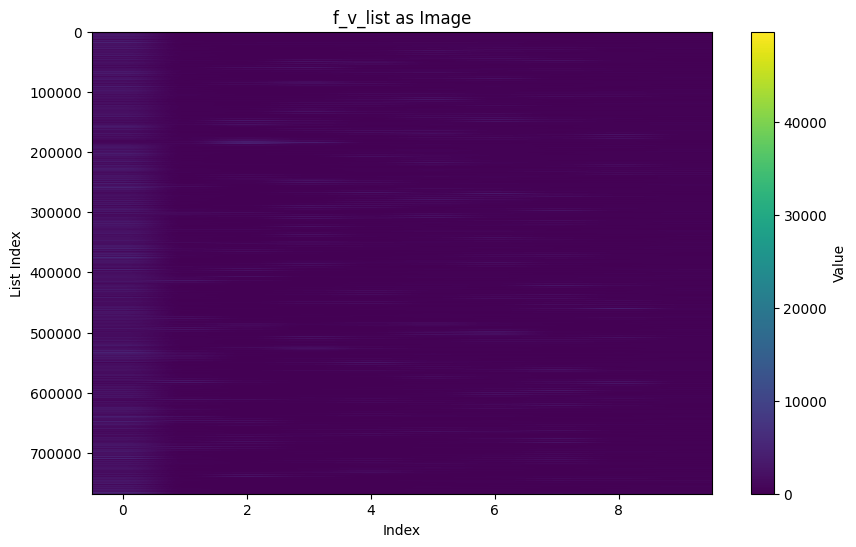

In [15]:
import numpy as np

import matplotlib.pyplot as plt

# Convertendo f_v_list para um array numpy para facilitar a manipulação
f_v_array = np.array(f_v_list)

# Plotando a imagem
plt.figure(figsize=(10, 6))
plt.imshow(f_v_array, aspect='auto', cmap='viridis')
plt.colorbar(label='Value')
plt.title('f_v_list as Image')
plt.xlabel('Index')
plt.ylabel('List Index')
plt.show()

In [2]:
import os
import shutil

# Caminho da pasta com os arquivos
source_dir = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/stF-0320x0240-wavys-09 (1)/stF-0320x0240-wavys-09'

# Listando todos os arquivos na pasta
files = os.listdir(source_dir)

# Criando diretórios baseados no final dos nomes dos arquivos e movendo os arquivos
for file in files:
    # Obtendo a parte final do nome do arquivo (sem extensão)
    file_extension = os.path.splitext(file)[1]
    base_name = os.path.splitext(file)[0]
    final_part = base_name.split('-')[-1]
    
    # Criando o caminho do novo diretório
    new_dir = os.path.join(source_dir, final_part)
    
    # Criando o diretório se não existir
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    
    # Movendo o arquivo para o novo diretório
    shutil.move(os.path.join(source_dir, file), os.path.join(new_dir, file))

print("Arquivos separados pelo final do nome e movidos para diretórios correspondentes.")

Arquivos separados pelo final do nome e movidos para diretórios correspondentes.


In [2]:
from math import comb
m=5

w_list = [comb(m-1, i) for i in range(m)]

In [3]:
w_list


[1, 4, 6, 4, 1]

In [3]:
import numpy as np

In [31]:
import numpy as np

# Criando um array tridimensional de exemplo
array_3d = np.array([[[100, 150, 3], [7, 5, 6], [7, 8, 9]],
                     [[10, 11, 12], [13, 14, 15], [160, 17, 18]],
                     [[19, 40, 21], [22, 23, 24], [25, 26, 27]]])

print(array_3d)
print("Shape do array:", array_3d.shape)

[[[100 150   3]
  [  7   5   6]
  [  7   8   9]]

 [[ 10  11  12]
  [ 13  14  15]
  [160  17  18]]

 [[ 19  40  21]
  [ 22  23  24]
  [ 25  26  27]]]
Shape do array: (3, 3, 3)


In [32]:
np.argmax(array_3d)

15

In [35]:
np.argmax(array_3d, axis=0)

array([[0, 0, 2],
       [2, 2, 2],
       [1, 2, 2]])

In [37]:
np.floor(3.9)

3.0

In [2]:
import numpy as np
from math import floor, cos, pi

def select_1D_fuzzy(val, kfuz):
    nframes = len(val)

    # 1. Calcular o índice inteiro mais próximo de kfuz
    kint = int(floor(kfuz + 0.5))

    # 2. Definir a janela de interpolação
    if kint <= 1:
        k0, k1 = 0, 2
    elif kint >= nframes - 2:
        k0, k1 = nframes - 3, nframes - 1
    else:
        k0, k1 = kint - 2, kint + 2

    # Número de pontos selecionados (m)
    m = k1 - k0 + 1
    assert m == 3 or m == 5

    # 3. Calcular a diferença fracionária s
    s = kfuz - kint
    assert -0.5 <= s <= 0.5

    # 4. Definir os vetores x e y
    x = np.array([k0 + j for j in range(m)])
    y = np.array([val[k0 + j] for j in range(m)])

    # 5. Calcular os pesos w
    a = pi * 0.5 * (m + 1)
    w = np.array([0.5 * (1 + cos(a * (k0 + j - kfuz))) for j in range(m)])

    # 6. Ajustar a parábola usando regressão quadrática ponderada
    # Construir a matriz para o sistema linear: [1, x, x^2]
    X = np.vstack([np.ones(m), x, x**2]).T

    # Resolução do sistema para obter A, B, C (coeficientes da parábola)
    W = np.diag(w)  # Matriz diagonal com os pesos
    XtWX = X.T @ W @ X  # Produto matricial X^T * W * X
    XtWy = X.T @ W @ y  # Produto matricial X^T * W * y
    A, B, C = np.linalg.solve(XtWX, XtWy)  # Resolver o sistema linear

    # 7. Calcular o valor interpolado em kfuz
    vsel = A * (kfuz ** 2) + B * kfuz + C

    # 8. Retornar o valor interpolado
    return vsel



Valor interpolado: 21.32


In [3]:

# Exemplo de uso
val = [0.20, 0.40, 0.70, 0.30, 0.10]
kfuz = 3.4
resultado = select_1D_fuzzy(val, kfuz)
print(f"Valor interpolado: {resultado:.2f}")

Valor interpolado: 21.32


In [4]:
import numpy as np
from math import floor, pi, cos

def quadratic_interpolation(val, kfuz):
    nframes = len(val)
    
    # Passo 1: Calcular o índice inteiro mais próximo de kfuz
    kint = int(floor(kfuz + 0.5))
    
    # Passo 2: Definir a janela de interpolação
    if kint <= 1:
        k0 = 0
        k1 = 2
    elif kint >= nframes - 2:
        k0 = nframes - 3
        k1 = nframes - 1
    else:
        k0 = kint - 2
        k1 = kint + 2
    
    m = k1 - k0 + 1
    
    # Passo 3: Calcular a diferença fracionária s
    s = kfuz - kint
    assert -0.5 <= s <= 0.5
    
    # Passo 4: Definir os vetores x e y
    x = [k0 + j for j in range(m)]
    y = [val[k0 + j] for j in range(m)]
    
    # Passo 5: Calcular os pesos w
    a = pi * 0.5 * (m + 1)
    w = [0.5 * (1 + cos(a * (k0 + j - kfuz))) for j in range(m)]
    
    # Passo 6: Regressão quadrática ponderada
    X = np.vstack([np.ones(m), x, np.square(x)]).T
    W = np.diag(w)
    A = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
    
    # Coeficientes da parábola
    C, B, A = A
    
    # Passo 7: Calcular o valor interpolado vsel
    vsel = A * (kfuz ** 2) + B * kfuz + C
    
    # Passo 8: Retornar o valor interpolado
    return vsel

In [16]:

# Exemplo de uso
val = [0.20, 0.40, 0.70, 0.30, 0.10]
kfuz = 1.9
resultado = quadratic_interpolation(val, kfuz)
print(f"Valor interpolado: {resultado:.2f}")

Valor interpolado: 0.64


In [2]:
from math import floor, sqrt, comb
floor(3.4)

3